# 🔰 Project Goal:
Building a Local Food Wastage Management System which uses:
postgreSQL as a database
python (Jupyter Notebook) for data processing
CSV files as raw data sources
Eventually possibly Streamlit or other tools for the frontend

# 🧠 WHY pandas is used:
pandas is a powerful Python library used for:
Reading and writing structured data (like CSV files)
Data cleaning and manipulation
Converting and formatting values (e.g., date/time)
Working with tables (like SQL tables) directly in memory

# In this project:
Your CSV files (providers_data.csv, etc.) are read using pandas
pandas DataFrames let you clean, reformat, and process data before inserting it into PostgreSQL

# 🧮 Data Preparation

### 🛠️ STEP 1: Import Libraries

In [1397]:
import pandas as pd  # For reading and cleaning CSV data
from sqlalchemy import create_engine  # To connect Python to PostgreSQL
from sqlalchemy import text

### 🧩 STEP 2: Define Database Connection

In [1400]:
username = 'postgres'
password = 'PASSsql'     
host = 'localhost'
port = '5432'
database = 'food_waste_db'

### 🔌 STEP 3: Create SQLAlchemy Engine (Connection)

In [1403]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

### ✅ Step 4: Load your CSV files

In [1406]:
providers_df = pd.read_csv("C:/Users/purni/Desktop/project.py/providers_data.csv")
receivers_df = pd.read_csv("C:/Users/purni/Desktop/project.py/receivers_data.csv")
food_listings_df = pd.read_csv("C:/Users/purni/Desktop/project.py/food_listings_data.csv")
claims_df = pd.read_csv("C:/Users/purni/Desktop/project.py/claims_data.csv")

### ✅ Step 5. Preview the Data

In [1423]:
print("📦 Providers Data:")
display(providers_df.head())

print("\n🎯 Receivers Data:")
display(receivers_df.head())

print("\n🥗 Food Listings Data:")
display(food_listings_df.head())

print("\n📬 Claims Data:")
display(claims_df.head())


📦 Providers Data:


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577



🎯 Receivers Data:


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154



🥗 Food Listings Data:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner



📬 Claims Data:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


# 🗂️ Database Creation

### 🔁Convert date columns to proper datetime

In [1428]:
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'])
claims_df['Timestamp'] = pd.to_datetime(claims_df['Timestamp'])

### 🧼 Data Cleaning for providers_df

In [1023]:
print(providers_df.columns.tolist())

['Provider_ID', 'Name', 'Type', 'Address', 'City', 'Contact']


####	🔹Removing Existing ID Column Before Inserting to SQL

In [1435]:
if 'provider_id' in providers_df.columns:
    providers_df = providers_df.drop(columns=['provider_id'])

#### 🔹Filter Only Required Columns for Insertion

In [1445]:
expected_columns = ['Name', 'Type', 'Address', 'City', 'Contact']
providers_df = providers_df[expected_columns]

##### 🔹 Standardizing Column Names (Lowercase & Stripped)

In [1448]:
providers_df.columns = providers_df.columns.str.strip().str.lower()

#### 🔹 Remove Duplicates

In [1451]:
existing_names = pd.read_sql("SELECT name FROM providers", con=engine)
providers_df = providers_df[~providers_df['name'].isin(existing_names['name'])]

##### 🔹 Insert Data into PostgreSQL

In [1454]:
providers_df.to_sql('providers', con=engine, if_exists='append', index=False)

0

###  🧼 Clean and Insert receivers_df

In [1457]:
print(receivers_df.columns.tolist())


['Receiver_ID', 'Name', 'Type', 'City', 'Contact']


#### 🔹Resetting Auto-Increment Primary Key 

In [1460]:
if 'receiver_id' in receivers_df.columns:
    receivers_df = receivers_df.drop(columns=['receiver_id'])

#### 🔹 Normalize Column Names: Lowercase and Strip Spaces

In [1463]:
receivers_df.columns = receivers_df.columns.str.strip().str.lower()

#### 🔹 Filter Only Required Columns for Insertion

In [1466]:
expected_columns = ['name', 'type', 'city', 'contact']
receivers_df = receivers_df[expected_columns]


#### 🔹 Removing Duplicate 

In [1469]:
existing_names = pd.read_sql("SELECT name FROM receivers", con=engine)
receivers_df = receivers_df[~receivers_df['name'].isin(existing_names['name'])]


#### 🔹Insert data

In [1472]:
receivers_df.to_sql('receivers', con=engine, if_exists='append', index=False)


0

### 🧼Clean and Insert food_listings_df

In [1475]:
print(food_listings_df.columns.tolist())


['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID', 'Provider_Type', 'Location', 'Food_Type', 'Meal_Type']


#### 🔹Removing Existing ID Column Before Inserting to SQL

In [1478]:
if 'food_id' in food_listings_df.columns:
    food_listings_df = food_listings_df.drop(columns=['food_id'])


#### 🔹Clean Column Names for Consistency

In [1481]:
food_listings_df.columns = food_listings_df.columns.str.strip().str.lower()


#### 🔹Filter Only Required Columns for Insertion

In [1484]:
expected_columns = ['food_name', 'quantity', 'expiry_date', 'provider_id', 
                    'provider_type', 'location', 'food_type', 'meal_type']
food_listings_df = food_listings_df[expected_columns]


#### 🔹Insert Data

In [1487]:
food_listings_df.to_sql('food_listings', con=engine, if_exists='append', index=False)


1000

### 🧼 Clean and Insert claims_df

In [1505]:
print(claims_df.columns.tolist())


['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp']


#### 🔹Removing Existing ID Column Before Inserting to SQL

In [1508]:
if 'claim_id' in claims_df.columns:
    claims_df = claims_df.drop(columns=['claim_id'])


#### 🔹Clean Column Names for Consistency

In [1511]:
claims_df.columns = claims_df.columns.str.strip().str.lower()

#### 🔹Filter Only Required Columns for Insertion

In [1514]:
expected_columns = ['food_id', 'receiver_id', 'status', 'timestamp']
claims_df = claims_df[expected_columns]


#### 🔹Insert Data

In [1517]:
claims_df.to_sql('claims', con=engine, if_exists='append', index=False)


1000

### ✅ Verify Data Inserted :

In [1520]:
with engine.connect() as conn:
    result = conn.execute(text("SELECT COUNT(*) FROM food_listings"))
    print("Food Listings rows:", result.scalar())

Food Listings rows: 6000


# 📊Data Analysis

### Questions to be Answered (SQL Queries & Analysis)

#### Question1. How many food providers and receivers are there in each city?

In [1525]:
query1 = """
SELECT city, 
       COUNT(DISTINCT provider_id) AS total_providers,
       COUNT(DISTINCT receiver_id) AS total_receivers
FROM providers
FULL OUTER JOIN receivers USING (city)
GROUP BY city;
"""
pd.read_sql(query1, con=engine)


,city,total_providers,total_receivers
0,Aaronshire,0,1
1,Adambury,1,0
2,Adamland,0,1
3,Adamsview,1,0
4,Adamsville,1,0
...,...,...,...
1873,Yatesside,1,0
1874,Youngchester,1,0
1875,Zacharyview,0,1
1876,Zimmermanton,1,0


#### 🍽️ Question 2. Which type of food provider contributes the most food?

In [1528]:
query2 = """
SELECT provider_type, COUNT(*) AS total_listings
FROM food_listings
GROUP BY provider_type
ORDER BY total_listings DESC;
"""
pd.read_sql(query2, con=engine)


,provider_type,total_listings
0,Supermarket,1602
1,Restaurant,1548
2,Grocery Store,1458
3,Catering Service,1392


#### 📞Question 3. Contact info of food providers in a specific city ("Delhi")

In [1531]:
pd.read_sql("SELECT DISTINCT city FROM providers;", con=engine)


,city
0,West Omar
1,Port Daniellechester
2,Tyronebury
3,New Bobbytown
4,New William
...,...
958,Bentleyburgh
959,Anthonyfort
960,Port Daniel
961,Lake Kyle


In [1533]:
# Choose a valid city from your database
city_to_filter = 'West Omar'  # You can change this to any valid city from your list

# SQL query
query3 = f"""
SELECT provider_id, name, type, address, city, contact
FROM providers
WHERE city = '{city_to_filter}';
"""

# Run the query and display result
providers_in_city = pd.read_sql(query3, con=engine)

# Check and print the result
if not providers_in_city.empty:
    display(providers_in_city)
else:
    print(f"No providers found in city: {city_to_filter}")


,provider_id,name,type,address,city,contact
0,377,Cooper-Gill,Catering Service,"94711 Tracy Court Apt. 437\nTammyborough, ME 8...",West Omar,+1-161-221-8545x570


#### ✅ Question 4: Which receivers have claimed the most food?

In [1536]:
# SQL query to find receivers with the most claims
query4 = """
SELECT r.receiver_id, r.name AS receiver_name, COUNT(c.claim_id) AS total_claims
FROM claims c
JOIN receivers r ON c.receiver_id = r.receiver_id
GROUP BY r.receiver_id, r.name
ORDER BY total_claims DESC;
"""

# Execute the query
top_receivers = pd.read_sql(query4, con=engine)

# Display the result
display(top_receivers.head(10))  # Show top 10 receivers


,receiver_id,receiver_name,total_claims
0,276,Scott Hunter,30
1,742,Matthew Webb,30
2,800,Anthony Garcia,30
3,371,William Frederick,30
4,493,Chelsea Powell,24
5,90,Alvin West,24
6,301,Kristina Simpson,24
7,410,Betty Reid,24
8,505,Alexandra Owens,24
9,324,Kristine Martin,24


#### ✅ Question 5: What is the total quantity of food available from all providers?

In [1124]:
# SQL query to calculate total quantity of food available
query5 = """
SELECT SUM(quantity) AS total_quantity_available
FROM food_listings;
"""

# Execute the query
total_food = pd.read_sql(query5, con=engine)

# Display result
display(total_food)


,total_quantity_available
0,128970


#### ✅ Question 6: Which city has the highest number of food listings?

In [1127]:
# SQL query to find the city with the highest number of food listings
query6 = """
SELECT location AS city, COUNT(*) AS num_listings
FROM food_listings
GROUP BY location
ORDER BY num_listings DESC
LIMIT 1;
"""

# Execute the query
top_city_listings = pd.read_sql(query6, con=engine)

# Display result
display(top_city_listings)


,city,num_listings
0,New Carol,30


#### ✅ Question 7: What are the most commonly available food types?

In [1130]:
# SQL query to find the most commonly available food types
query7 = """
SELECT food_type, COUNT(*) AS count
FROM food_listings
GROUP BY food_type
ORDER BY count DESC;
"""

# Execute the query
common_food_types = pd.read_sql(query7, con=engine)

# Display result
display(common_food_types)


,food_type,count
0,Vegetarian,1680
1,Vegan,1670
2,Non-Vegetarian,1650


#### ✅ Question 8: How many food claims have been made for each food item?

In [1133]:
# SQL query to count claims per food item
query8 = """
SELECT f.food_name, COUNT(c.claim_id) AS total_claims
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
GROUP BY f.food_name
ORDER BY total_claims DESC;
"""

# Execute query
claims_per_food = pd.read_sql(query8, con=engine)

# Display result
display(claims_per_food)


,food_name,total_claims
0,Rice,610
1,Soup,570
2,Dairy,550
3,Fish,540
4,Salad,530
5,Chicken,510
6,Bread,470
7,Pasta,435
8,Vegetables,430
9,Fruits,355


#### ✅ Question 9: Which provider has had the highest number of successful food claims?

In [1136]:
# SQL query for top provider by successful (completed) claims
query9 = """
SELECT p.name AS provider_name, COUNT(c.claim_id) AS successful_claims
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
JOIN providers p ON f.provider_id = p.provider_id
WHERE c.status = 'Completed'
GROUP BY p.name
ORDER BY successful_claims DESC;
"""

# Execute query
top_providers_by_claims = pd.read_sql(query9, con=engine)

# Display result
display(top_providers_by_claims)


,provider_name,successful_claims
0,Barry Group,25
1,Butler-Richardson,20
2,"Barnes, Castro and Curtis",20
3,Miller Inc,20
4,"Harper, Blake and Alexander",20
...,...,...
243,"Myers, Kelley and Riley",5
244,Burns-Davis,5
245,Figueroa Inc,5
246,Nguyen-Parsons,5


#### ✅ Question 10: What percentage of food claims are Completed vs. Pending vs. Cancelled?

In [1139]:
# SQL query to get count and percentage of each claim status
query10 = """
SELECT status,
       COUNT(*) AS total,
       ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS percentage
FROM claims
GROUP BY status
ORDER BY percentage DESC;
"""

# Execute query
claim_status_distribution = pd.read_sql(query10, con=engine)

# Display result
display(claim_status_distribution)


,status,total,percentage
0,Completed,1695,33.9
1,Cancelled,1680,33.6
2,Pending,1625,32.5


#### ✅ Question 11: What is the average quantity of food claimed per receiver?

In [1142]:
query11 = """
SELECT c.receiver_id,
       r.name AS receiver_name,
       ROUND(AVG(f.quantity), 2) AS avg_quantity_claimed
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
JOIN receivers r ON c.receiver_id = r.receiver_id
GROUP BY c.receiver_id, r.name
ORDER BY avg_quantity_claimed DESC;
"""

# Execute query
avg_quantity_per_receiver = pd.read_sql(query11, con=engine)

# Display result
display(avg_quantity_per_receiver)


,receiver_id,receiver_name,avg_quantity_claimed
0,99,Nancy Silva,50.0
1,616,Christopher Wright,50.0
2,567,Peggy Knight,50.0
3,282,Lisa Pitts,50.0
4,982,Thomas Villanueva,50.0
...,...,...,...
619,214,Corey Rodriguez,2.0
620,766,John Reynolds,2.0
621,746,Kenneth Barnes,2.0
622,765,Joshua Hooper,1.0


#### ✅ Question 12: Which meal type (Breakfast, Lunch, Dinner, Snacks) is claimed the most?

In [1145]:
query12 = """
SELECT f.meal_type, COUNT(*) AS total_claims
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
GROUP BY f.meal_type
ORDER BY total_claims DESC;
"""

# Execute query
most_claimed_meals = pd.read_sql(query12, con=engine)

# Display result
display(most_claimed_meals)


,meal_type,total_claims
0,Breakfast,1390
1,Lunch,1250
2,Snacks,1200
3,Dinner,1160


#### ✅ Question 13: What is the total quantity of food donated by each provider?

In [1147]:
query13 = """
SELECT pr.provider_id, pr.name AS provider_name, SUM(f.quantity) AS total_quantity_donated
FROM food_listings f
JOIN providers pr ON f.provider_id = pr.provider_id
GROUP BY pr.provider_id, pr.name
ORDER BY total_quantity_donated DESC;
"""

# Run the query
donations_by_provider = pd.read_sql(query13, con=engine)

# Display results
display(donations_by_provider)


,provider_id,provider_name,total_quantity_donated
0,709,Barry Group,895
1,306,"Evans, Wright and Mitchell",790
2,655,Smith Group,750
3,315,Nelson LLC,710
4,678,Ruiz-Oneal,700
...,...,...,...
632,258,Gonzales-Moore,5
633,870,Mcgee PLC,5
634,939,Reyes and Sons,5
635,849,Brown and Sons,5


#### ❓ Q14: What is the average quantity of food claimed per receiver?

In [1149]:
query14 = """
SELECT r.receiver_id, r.name AS receiver_name, AVG(f.quantity) AS avg_quantity_claimed
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
JOIN receivers r ON c.receiver_id = r.receiver_id
WHERE c.status = 'Completed'
GROUP BY r.receiver_id, r.name
ORDER BY avg_quantity_claimed DESC;
"""

# Execute the query
avg_quantity_per_receiver = pd.read_sql(query14, con=engine)

# Display the result
display(avg_quantity_per_receiver)


,receiver_id,receiver_name,avg_quantity_claimed
0,9,Emily Turner,50.0
1,585,Mark Lewis,50.0
2,28,Mary Franklin,50.0
3,102,Daniel Burton,50.0
4,99,Nancy Silva,50.0
...,...,...,...
288,460,Karen Stafford,2.0
289,968,Mr. Joseph Herring,2.0
290,904,Amanda Kline,1.0
291,608,Oscar Bauer,1.0


#### ❓ Q15: Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

In [1151]:
query15 = """
SELECT f.meal_type, COUNT(*) AS claim_count
FROM claims c
JOIN food_listings f ON c.food_id = f.food_id
WHERE c.status = 'Completed'
GROUP BY f.meal_type
ORDER BY claim_count DESC;
"""

# Execute the query
most_claimed_meal_type = pd.read_sql(query15, con=engine)

# Display the result
display(most_claimed_meal_type)


,meal_type,claim_count
0,Breakfast,475
1,Dinner,430
2,Lunch,420
3,Snacks,370


# 📈Data Visualization

In [1371]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Food providers and receivers are there in each city

In [1374]:
query1 = """
SELECT 
    COALESCE(p.city, r.city) AS city,
    COUNT(DISTINCT p.provider_id) AS num_providers,
    COUNT(DISTINCT r.receiver_id) AS num_receivers
FROM providers p
FULL JOIN receivers r ON p.city = r.city
GROUP BY COALESCE(p.city, r.city)
ORDER BY city;
"""

city_counts_df = pd.read_sql(query1, con=engine)

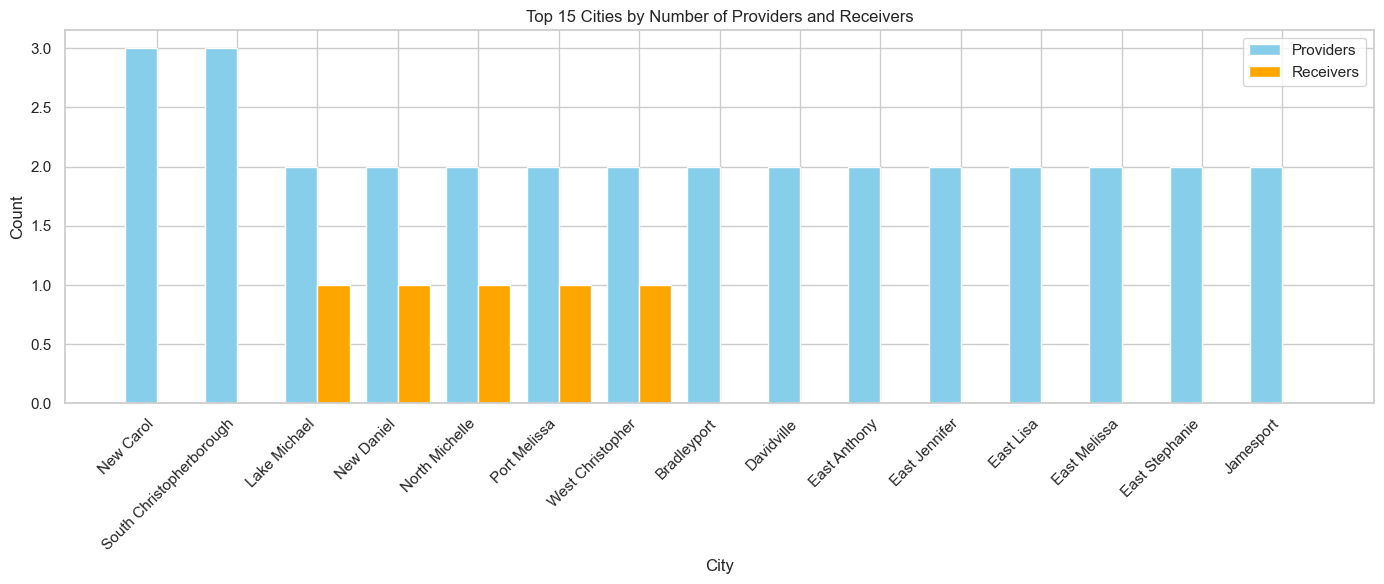

In [1376]:
# Optional: show only top 15 cities for clarity
top_cities = city_counts_df.sort_values(
    by=['num_providers', 'num_receivers'], ascending=False).head(15)

# Set plot style
plt.figure(figsize=(14, 6))
x = top_cities['city']
p = top_cities['num_providers']
r = top_cities['num_receivers']

# Plot both bars side by side
bar_width = 0.4
index = range(len(top_cities))

plt.bar(index, p, width=bar_width, label='Providers', color='skyblue')
plt.bar([i + bar_width for i in index], r, width=bar_width, label='Receivers', color='orange')

# Customize plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 15 Cities by Number of Providers and Receivers')
plt.xticks([i + bar_width/2 for i in index], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### 2.Number of Claims per Food Type

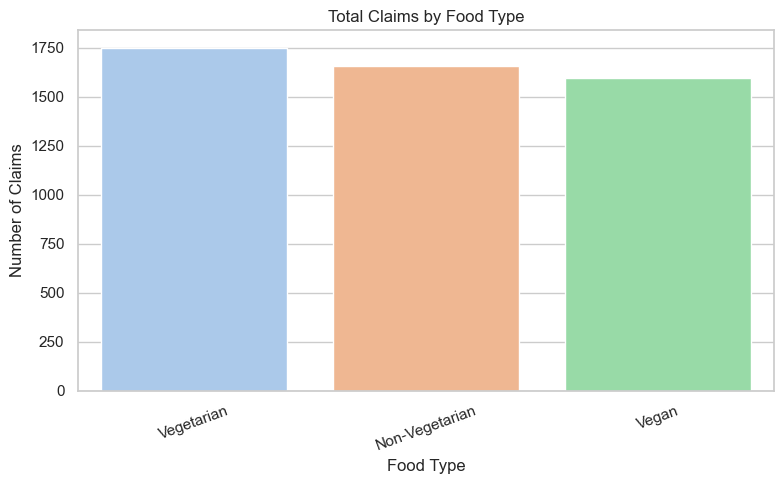

In [1379]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=category_claims_df,
    x='food_type',
    y='total_claims',
    hue='food_type',         # Assigning x to hue
    palette='pastel',
    legend=False             # Hides redundant legend
)
plt.title('Total Claims by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Number of Claims')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


###  3.Top 10 Most Frequently Donated Food Items

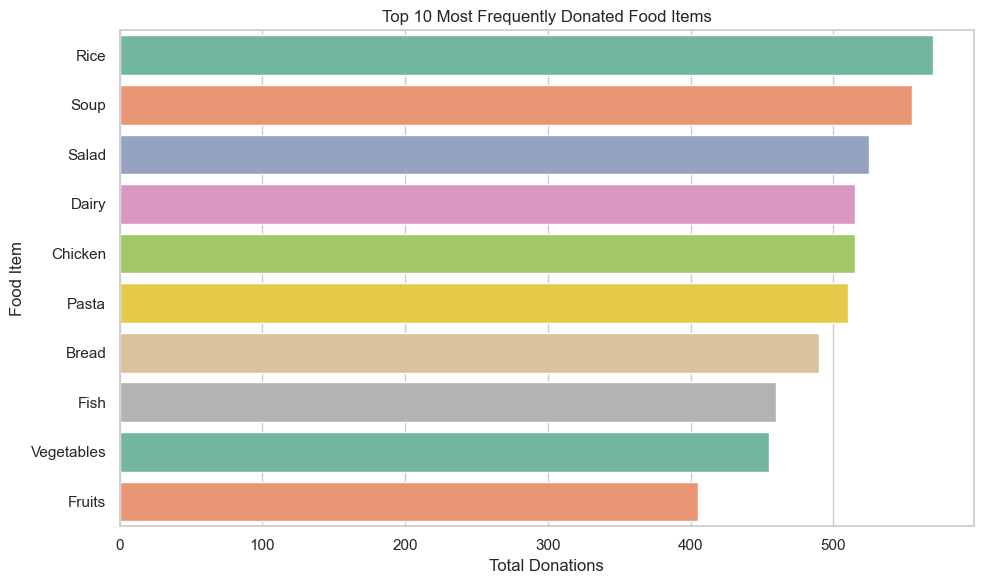

In [1382]:
query4 = """
SELECT food_name, COUNT(*) AS total_donations
FROM food_listings
GROUP BY food_name
ORDER BY total_donations DESC
LIMIT 10;
"""

top_foods_df = pd.read_sql(query4, con=engine)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_foods_df, x='total_donations', y='food_name', hue='food_name', palette='Set2', legend=False)
plt.title('Top 10 Most Frequently Donated Food Items')
plt.xlabel('Total Donations')
plt.ylabel('Food Item')
plt.tight_layout()
plt.show()

### 4. Distribution of Food Donations by Category

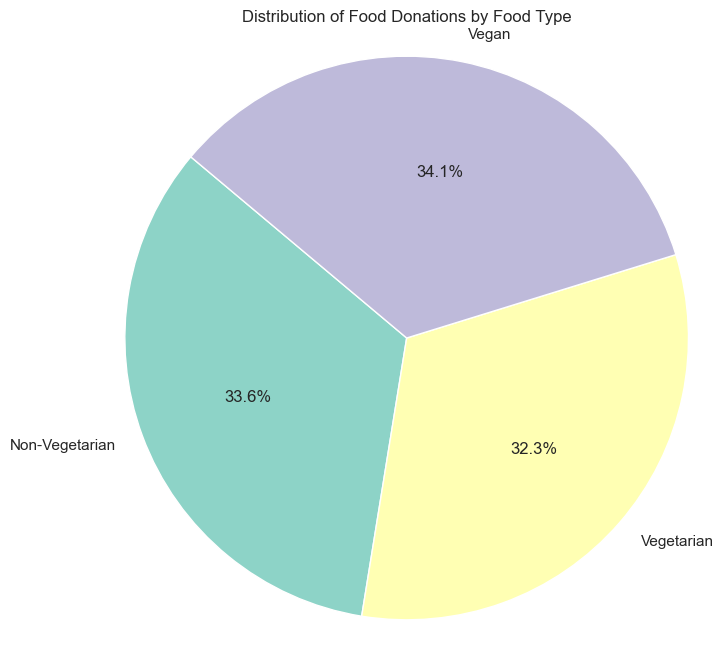

In [1385]:
query_pie = """
SELECT food_type, SUM(quantity) AS total_quantity
FROM food_listings
GROUP BY food_type;
"""

pie_df = pd.read_sql(query_pie, con=engine)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_df['total_quantity'], labels=pie_df['food_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Distribution of Food Donations by Food Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### 📈 5. Monthly Trend of Food Quantity Donated

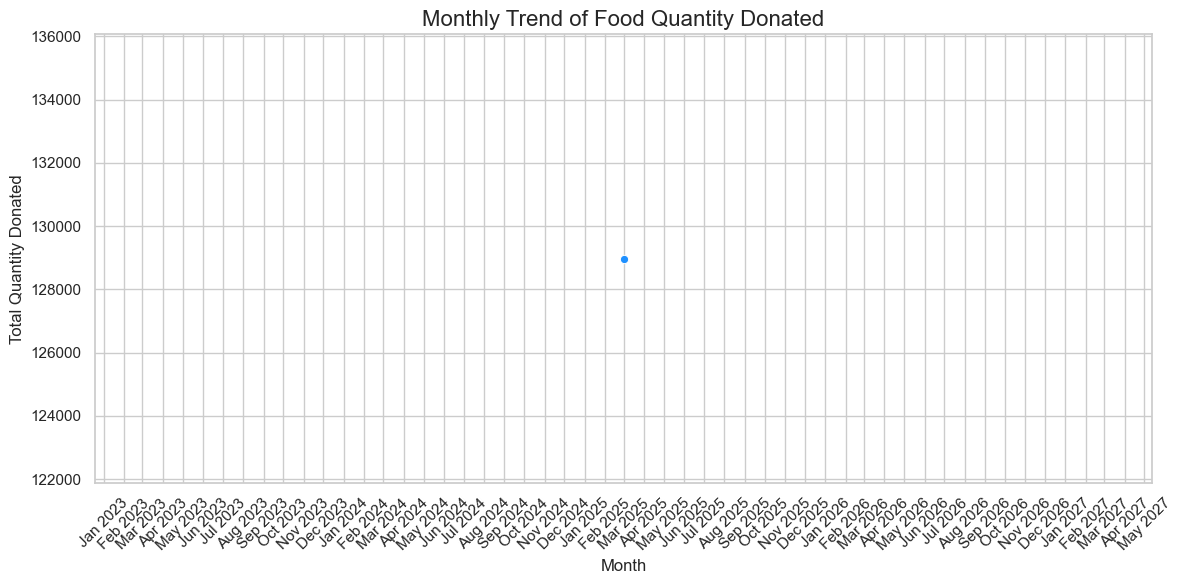

In [1392]:
query_line = """
SELECT DATE_TRUNC('month', expiry_date) AS donation_month, SUM(quantity) AS total_quantity
FROM food_listings
GROUP BY donation_month
ORDER BY donation_month;
"""

line_df = pd.read_sql(query_line, con=engine)

# Plot with enhancements
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=line_df,
    x='donation_month',
    y='total_quantity',
    marker='o',
    color='dodgerblue',
    linewidth=2.5
)

# Format x-axis as month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.title('Monthly Trend of Food Quantity Donated', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity Donated', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
